<h3>Interfacing between pandas and Model code</h3>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4>Statistical models</h4>
<p>A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population)
</p>

In [27]:
# using Numpy arrays to interface pandas and modeling tools
data = pd.DataFrame({
    "x0": [1, 2, 3, 4, 5],
    "x1": [0.01, -0.01, 0.25, -4.1, 0.],
    "y": [-1.5, 0., 3.6, 1.3, -2.]
})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [28]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [29]:
data.to_numpy()

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [30]:
# converting back to dataframe
df = pd.DataFrame(
    data.to_numpy(),
    columns=["x0", "x1", "y"],
)
df

,x0,x1,y
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [31]:
df3 = data.copy()
df3

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [32]:
df3["strings"] = ['a', 'b', 'c', 'd', 'e']
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [33]:
# indexing a subset of columns
model_cols = ["x0", "x1"]
model_cols

['x0', 'x1']

In [34]:
data.loc[:, model_cols]

,x0,x1
0,1,0.01
1,2,-0.01
2,3,0.25
3,4,-4.10
4,5,0.00


In [35]:
# categoricals
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [36]:
# using dummies
dummies = pd.get_dummies(data.category,
                         prefix="category")
dummies

,category_a,category_b
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


In [37]:
data_with_dummies = data.drop("category", axis=1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,True,False
1,2,-0.01,0.0,False,True
2,3,0.25,3.6,True,False
3,4,-4.10,1.3,True,False
4,5,0.00,-2.0,False,True


In [38]:
# using patsy library
data = pd.DataFrame({
    "x0": [1,2,3,4,5],
    "x1":[0.01, -0.01, 0.25, -4.1, 0.],
    "y":[-1.5, 0., 3.6, 1.3,-2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [39]:
import patsy
y, X = patsy.dmatrices("y~x0+x1", data)

In [40]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [41]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [42]:
# suppressing the intercept
y, X = patsy.dmatrices("y~x0+x1+0",
                data)
X

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [43]:
# passing patsy objects into algorithms
coef, resid, _, _ = np.linalg.lstsq(X, y, rcond=None)

In [44]:
coef

array([[ 0.00925424],
       [-0.25485421]])

In [50]:
resid

array([19.72552896])

In [52]:
# obtaining series
coef = pd.Series(coef.squeeze(),
                 index=X.design_info.column_names,
                )
coef

x0    0.009254
x1   -0.254854
dtype: float64

In [46]:
# More examples on linal.lstsq
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m

0.9999999999999999

In [47]:
c

-0.9499999999999997

In [48]:
# plotting

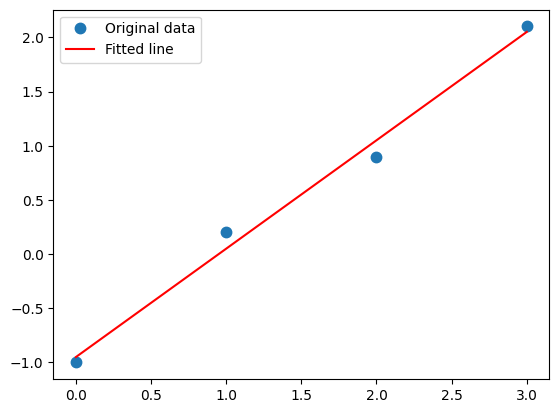

In [49]:
plt.plot(x,
         y,
         'o',
         label="Original data",
         markersize=7.5,
        )
plt.plot(x,
         m*x+c,
         'r',
         label="Fitted line",
        )
plt.legend()
plt.show()

<h3>Data Transformation in Patsy Formulas</h3>

In [53]:
y, X = patsy.dmatrices('y~x0+np.log(np.abs(x1) + 1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [54]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [55]:
# standaridizing and centering
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)',
                       data)
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [56]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [57]:
# Applying transformations on out-of-sample dataset
new_data = pd.DataFrame(
    {
        'x0': [6, 7, 8, 9],
        'x1': [3.1, -0.5, 0, 2.3],
        'y': [1, 2, 3, 4]
    })
new_data

,x0,x1,y
0,6,3.1,1
1,7,-0.5,2
2,8,0.0,3
3,9,2.3,4


In [58]:
new_X = patsy.build_design_matrices(
    [X.design_info], new_data)
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [60]:
# summation
y, X = patsy.dmatrices(
    'y ~ I(x0+x1)',
    data)
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

In [61]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [62]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

<h3>Categorical data and Patsy</h3>

In [67]:
data = pd.DataFrame({
    "key1": ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    "key2": [0, 1, 0, 1, 0, 1, 0, 0],
    "v1": [1, 2, 3, 4, 5, 6, 7, 8],
    "v2": [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
})
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [68]:
y, X = patsy.dmatrices('v2~key1',
                       data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [69]:
y

DesignMatrix with shape (8, 1)
    v2
  -1.0
   0.0
   2.5
  -0.5
   4.0
  -1.2
   0.2
  -1.7
  Terms:
    'v2' (column 0)

In [70]:
# Omitting intercept
y, X = patsy.dmatrices('v2~key1 + 0',
                       data)
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [71]:
# interpreting numerical data as categorical
y, X = patsy.dmatrices('v1~C(key2)',
                       data)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)